In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

In [306]:
import pandas as pd

In [4]:
# these codes were used to import the data into excel and then to dataframe

#mydf = open('failuretime.txt','r')
#ll = []
#for i in mydf:
#    ll.append(i.split(','))

In [6]:
#gg_df = pd.DataFrame(lf,columns=['stamp'])
#gg_df['count']=1
#df1 = pd.to_datetime(gg_df['stamp'])
#gg_df.drop(labels='stamp',axis=1,inplace=True)
#lf = ll[0]
#gg_df.head()

In [14]:
#gg_df['Timestamp'] = df1
#gg_df.head()
#writer = pd.ExcelWriter('failtime.xlsx')
#gg_df.to_excel(writer)
#writer.save()
#print('DataFrame is written successfully to Excel File.')

In [94]:
data = pd.read_excel('failtime.xlsx')

In [355]:
data.head()

,count
Timestamp,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1


In [96]:
data.set_index('Timestamp', inplace=True)

In [307]:
gg_15= data.resample('15T', how='sum',label='right')

C:\Users\AB Duke\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


In [357]:
gg_15.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [100]:
# label encoding the sequence is required
label = []
for i in range(0,len(gg_15)):
    if gg_15.values[i]>= 10:
        label.append(2)
    elif gg_15.values[i]== 0:
        label.append(0)
    else:
        label.append(1)

In [103]:
import numpy as np
xx_1h = np.array(label).reshape(2447,4)

In [104]:
xx_1h

array([[1, 1, 1, 1],
       [1, 1, 0, 1],
       [1, 1, 1, 1],
       ...,
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [105]:
new_df = pd.DataFrame(xx_1h,columns=['1st','2nd','3rd','4th'])

In [107]:
writer = pd.ExcelWriter('preprocessed_4steps.xlsx')
new_df.to_excel(writer)
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


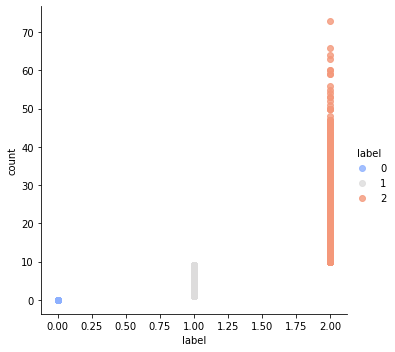

In [36]:
#sns.lmplot(y = 'count',x= 'label',hue='label',data= gg_15,palette='coolwarm',fit_reg=False)

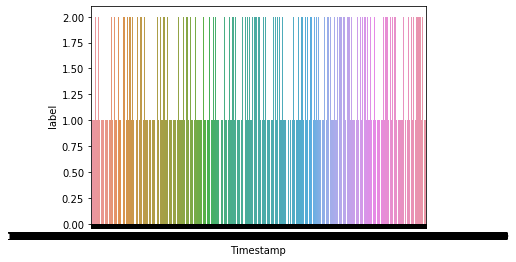

In [69]:
sns.barplot(y = gg_15['label'],x = gg_15.index)

In [110]:
cc = np.array(gg_15['count']).reshape(2447,4)


In [111]:
cc

array([[2, 6, 9, 7],
       [1, 4, 0, 4],
       [9, 8, 1, 3],
       ...,
       [7, 8, 4, 3],
       [5, 3, 9, 5],
       [5, 2, 7, 6]], dtype=int64)

In [134]:
vizdf = pd.DataFrame(gg_15['count']).reset_index()

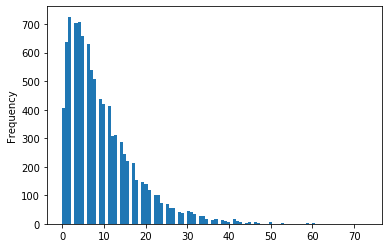

In [142]:
vizdf['count'].plot(kind='hist',bins = 100)

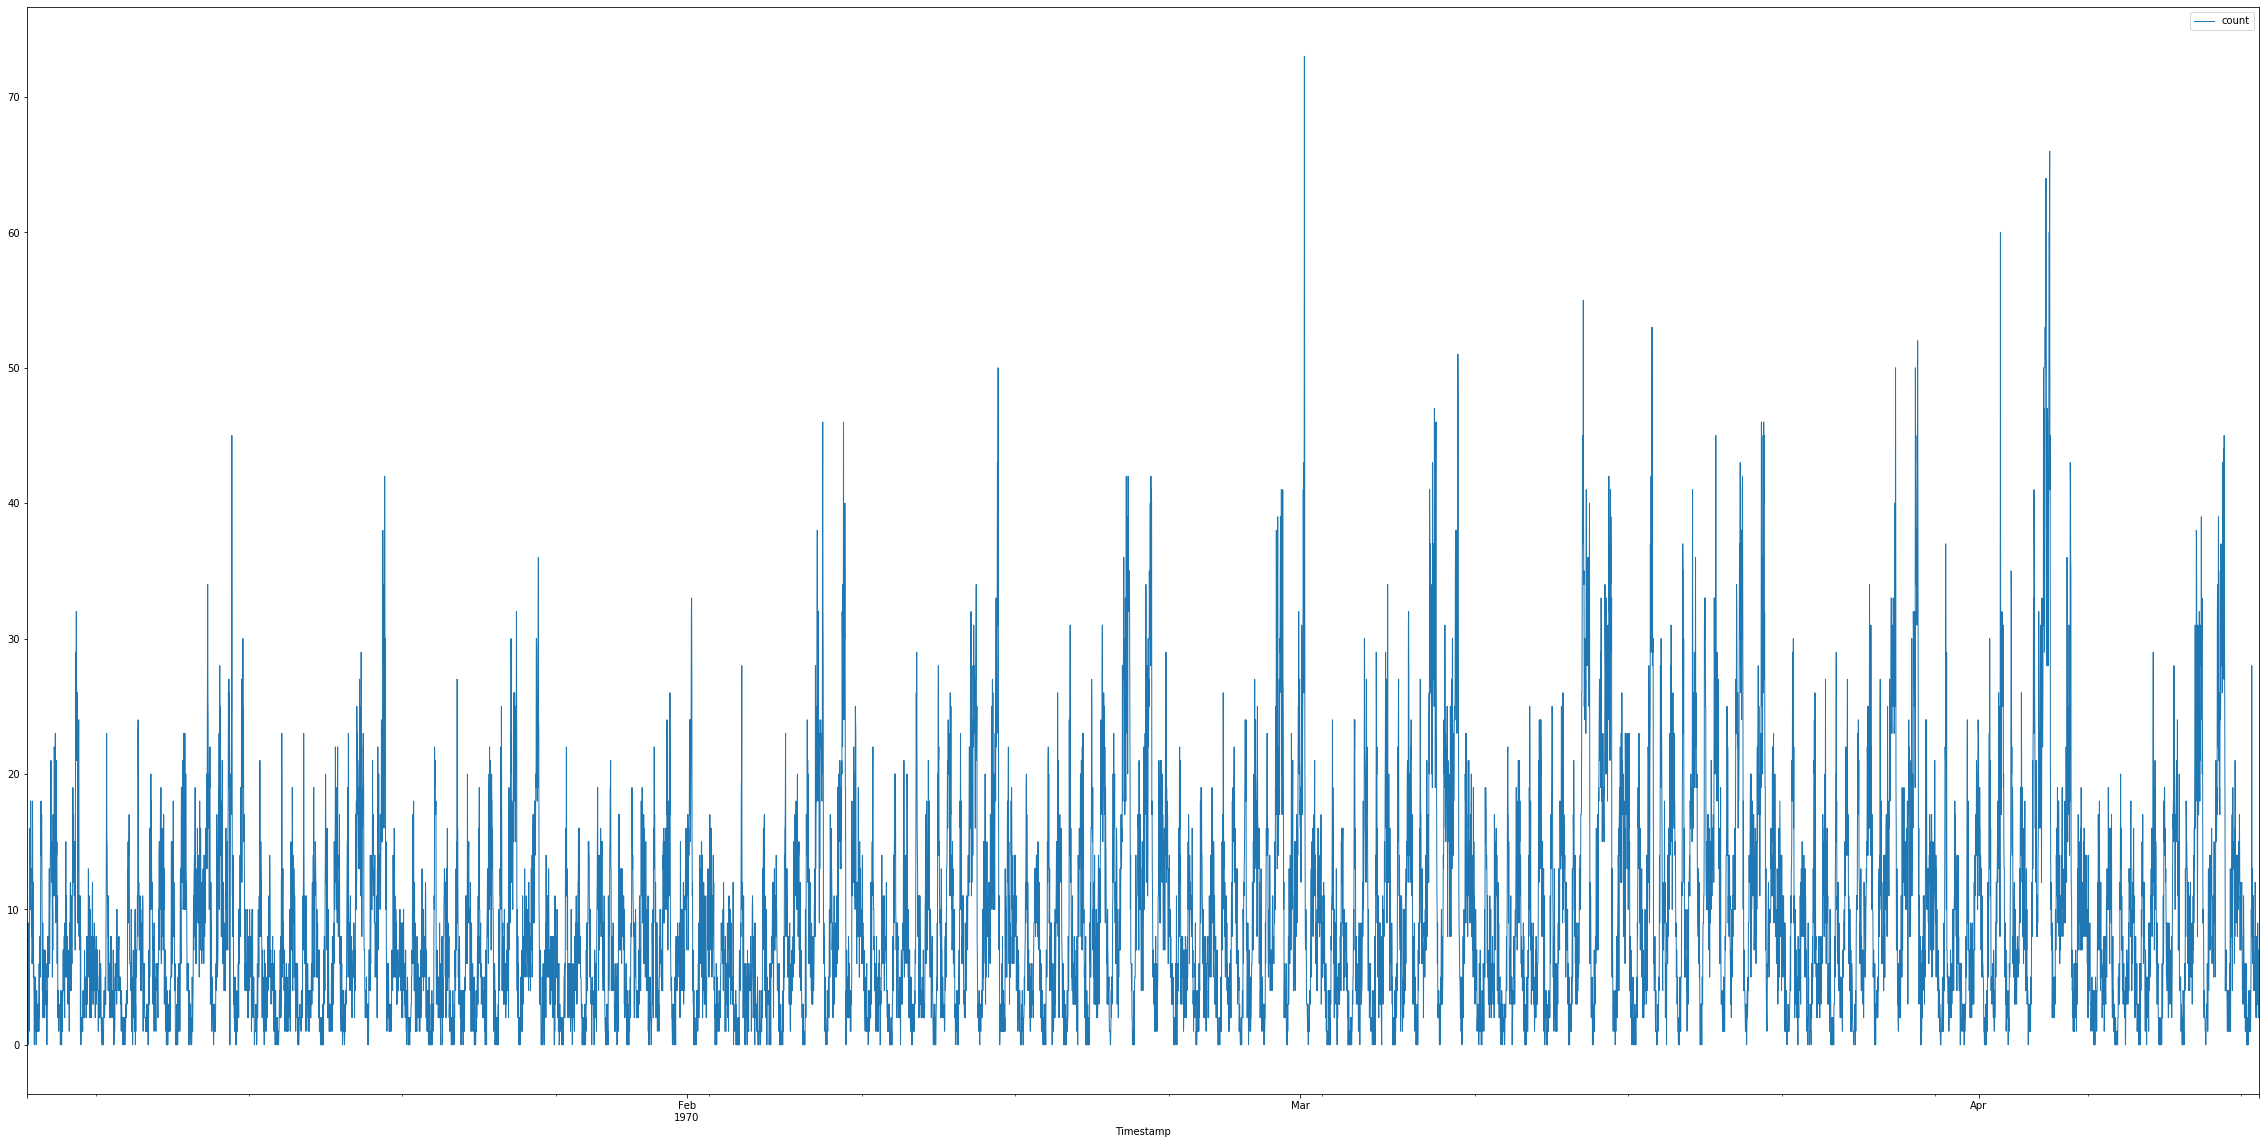

In [168]:
vizdf.plot.line(x = "Timestamp",y="count",figsize=(40,20),lw=1)


In [172]:
vizdf['class']= label

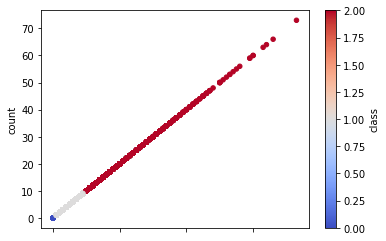

In [179]:
vizdf.plot.scatter(x='count',y='count',c='class',colormap='coolwarm')


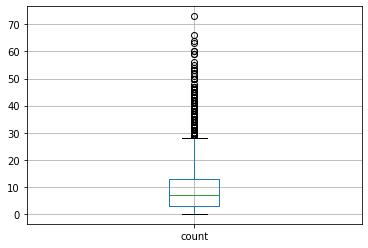

In [181]:
vizdf.boxplot(column='count')

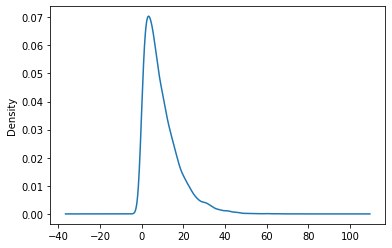

In [182]:
vizdf['count'].plot.kde()

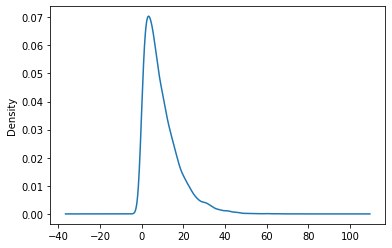

In [183]:
vizdf['count'].plot.density()

In [186]:
writer = pd.ExcelWriter('15mindata_4steps.xlsx')
pd.DataFrame(cc).to_excel(writer)
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


In [187]:
cc['class']
cc = pd.DataFrame(cc)


In [263]:
vv = pd.DataFrame(xx_1h)
vv['class'] = llb

In [265]:
vv.head()
writer = pd.ExcelWriter('15mindata_4stepswlabel.xlsx')
pd.DataFrame(vv).to_excel(writer)
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


In [361]:
from sklearn.cluster import KMeans
k_m = KMeans(n_clusters=3)
k_m.fit(vv)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [362]:
k_m.cluster_centers_

array([[1.11403509e+00, 1.14035088e+00, 1.32017544e+00, 2.00000000e+00,
        2.00000000e+00],
       [9.62411903e-01, 9.62411903e-01, 9.81205951e-01, 9.24823806e-01,
        4.10782519e-15],
       [1.87261146e+00, 1.90658174e+00, 1.90445860e+00, 1.80254777e+00,
        1.00000000e+00]])

In [334]:
llb = pd.DataFrame(k_m.labels_)

In [339]:
vv.describe()

,0,1,2,3,class
count,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000
mean,1.326931,1.342460,1.368206,1.362893,0.571312
std,0.556848,0.554849,0.560795,0.556589,0.656842
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000


In [340]:
xdf = pd.read_excel('15mindata_4stepswlabel.xlsx')
X =xdf.drop(labels='class',axis=1)
y =xdf['class']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
X_train, X_test, y_train, y_test = train_test_split(X,y.values.ravel(),test_size=0.2,stratify = y)

In [352]:
xdf.head()

,0,1,2,3,class
0,1,1,1,1,0
1,1,1,0,1,0
2,1,1,1,1,1
3,2,2,2,2,1
4,2,2,2,2,0


In [341]:
#Model 1
#from sklearn.linear_model import LogisticRegression

#model1 = LogisticRegression(max_iter=10000, solver='lbfgs',multi_class = 'auto')
#model1.fit(X_train, y_train)
#y_pred1 = model1.predict(X_test)
#print(classification_report(y_test,y_pred1))
#print(confusion_matrix(y_test,y_pred1))      

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       255
           1       0.79      0.80      0.80       189
           2       0.00      0.00      0.00        46

    accuracy                           0.78       490
   macro avg       0.52      0.57      0.54       490
weighted avg       0.71      0.78      0.74       490

[[229  26   0]
 [ 37 152   0]
 [ 31  15   0]]


C:\Users\AB Duke\Anaconda4\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [364]:
#Model2 Random forest with entropy
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(class_weight = 'balanced',max_depth=1000,n_estimators=250,min_samples_split=10,criterion='entropy')
model2.fit(X_train,y_train)
y_predrf=model2.predict(X_test)


#use print only if train_test_split is used
print(classification_report(y_test,y_predrf))
print(confusion_matrix(y_test,y_predrf))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       255
           1       0.79      0.72      0.75       189
           2       0.15      0.26      0.19        46

    accuracy                           0.71       490
   macro avg       0.59      0.59      0.58       490
weighted avg       0.75      0.71      0.73       490

[[198  26  31]
 [ 17 136  36]
 [ 23  11  12]]


In [363]:
from sklearn.ensemble import RandomForestClassifier
model6=RandomForestClassifier(class_weight = 'balanced',max_depth=100,n_estimators=250,min_samples_split=10,criterion='gini')
model6.fit(X_train,y_train)
y_predrf6=model6.predict(X_test)
print(classification_report(y_test,y_predrf6))
print(confusion_matrix(y_test,y_predrf6))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       255
           1       0.79      0.72      0.75       189
           2       0.15      0.26      0.19        46

    accuracy                           0.71       490
   macro avg       0.59      0.59      0.58       490
weighted avg       0.75      0.71      0.73       490

[[198  26  31]
 [ 17 136  36]
 [ 23  11  12]]


In [351]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('rfc', model6),('RF1', model2)]
#create our voting classifier, inputting our models
model5 = VotingClassifier(estimators, voting='soft')
#fit model to training data
model5.fit(X_train,y_train)
#test our model on the test data
ypred_en=model5.predict(X_test)
model5.score(X_test, y_test)

print(confusion_matrix(y_test,ypred_en))
print(classification_report(y_test,ypred_en))

[[198  26  31]
 [ 17 136  36]
 [ 23  11  12]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       255
           1       0.79      0.72      0.75       189
           2       0.15      0.26      0.19        46

    accuracy                           0.71       490
   macro avg       0.59      0.59      0.58       490
weighted avg       0.75      0.71      0.73       490



In [359]:
cc.head()

,0,1,2,3
0,2,6,9,7
1,1,4,0,4
2,9,8,1,3
3,16,13,14,15
4,10,18,12,13
